<a href="https://colab.research.google.com/github/Sanjeevp-07/AI-ML/blob/main/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def housing_data():
  tarpath = Path("datasets/housing.tgz")
  if not tarpath.is_file():
    Path("datasets").mkdir(parents = True, exist_ok =True )
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url , tarpath)
    with tarfile.open(tarpath)as housing_file:
      housing_file.extractall(path = "datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = housing_data()

housing.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


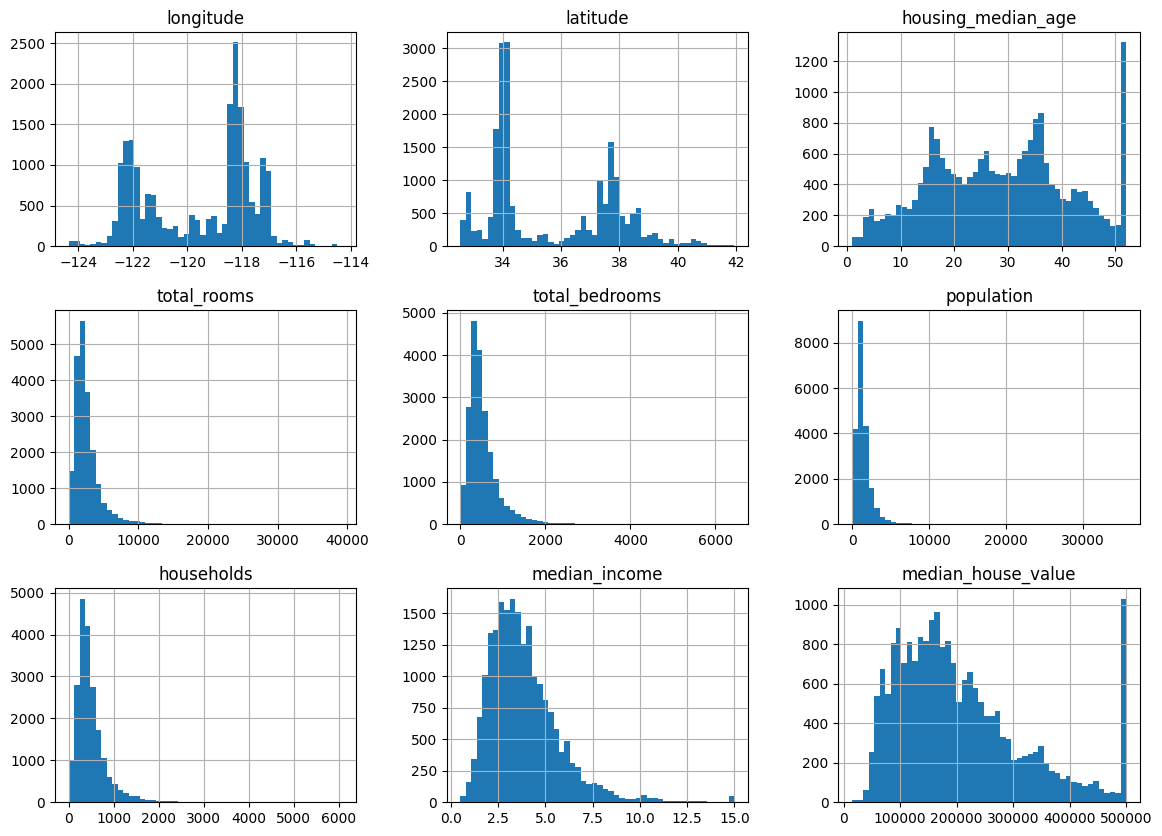

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(14,10))
plt.show()

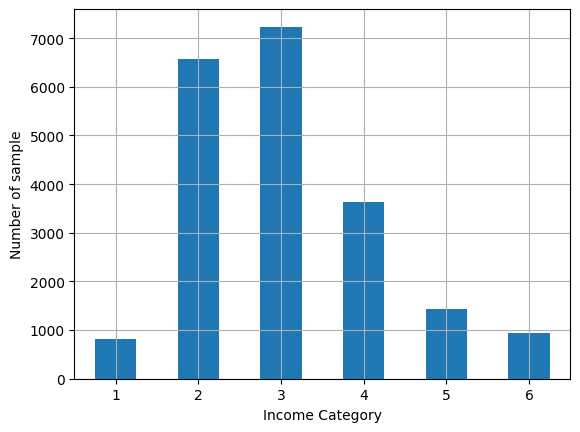

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



housing["income_cat"].value_counts().sort_index().plot.bar(rot=0 , grid= True)
plt.xlabel("Income Category")
plt.ylabel("Number of sample")
plt.show()

In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:

##It is a random shuffle between test set an dtrainset

def shuffle_Split_data(data, test_ratio):
  shuffled = np.random.permutation(len(data))
  test_size = int(len(data) * test_ratio)
  test_indices = shuffled[:test_size]
  train_indices = shuffled[test_size:]
  return data.iloc[test_indices], data.iloc[train_indices]

test_set, train_set = shuffle_Split_data(housing, 0.2)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

## It is a stratfied shuffle between test set and train set

splitter = StratifiedShuffleSplit(n_splits= 10, test_size=.2, random_state= 42)
start_splits= []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  start_train_set_n = housing.iloc[train_index]
  start_test_set_n = housing.iloc[test_index]
  start_splits.append([start_train_set_n, start_test_set_n])

start_train_set_n, start_test_set_n = start_splits[0]



In [ ]:
for set_ in (start_train_set_n, start_test_set_n):
  set_.drop("income_cat", axis = 1 ,inplace=True)

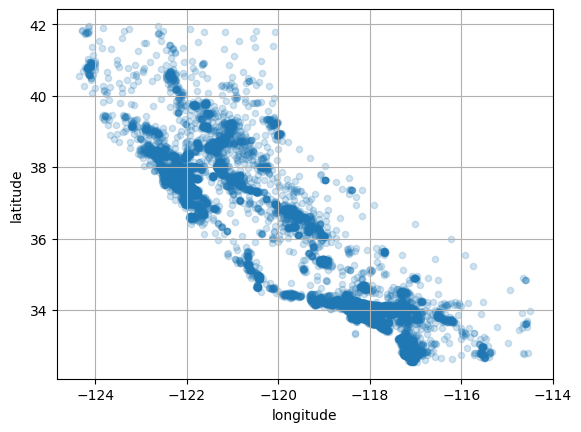

In [ ]:
housing = start_train_set_n.copy()
housing.plot(kind="scatter", x= "longitude", y="latitude", grid=True, alpha= 0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

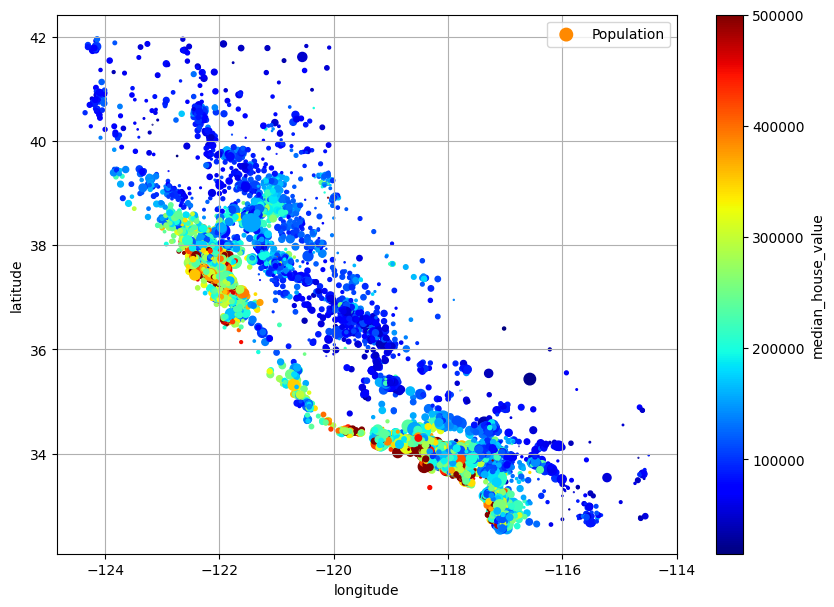

In [ ]:
housing.plot(kind="scatter", x= "longitude", y= "latitude", grid = True,
             s=housing["population"]/100, c= "median_house_valu e",
             cmap = "jet", colorbar= True, legend = True ,
             sharex=False, figsize= (10,7) ,label= "Population")

In [ ]:
housing.drop("ocean_proximity", axis=1 , inplace=True)

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.689631
total_rooms,0.139978
housing_median_age,0.101315
households,0.072895
total_bedrooms,0.055821
population,-0.017376
longitude,-0.045946
latitude,-0.143969


In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.689631
rooms_per_household,0.144747
total_rooms,0.139978
housing_median_age,0.101315
households,0.072895
total_bedrooms,0.055821
population,-0.017376
longitude,-0.045946
latitude,-0.143969


In [ ]:
housing = start_train_set_n.drop("median_house_value", axis = 1)
housing_label = start_train_set_n["median_house_value"].copy()